<a href="https://colab.research.google.com/github/Abdulahadazam/DEMO/blob/main/21l_1874_DS_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment : 2 (Data Preprocessing and Exploratory Data Analysis)**

**Instructions:**

* Submit your assignment through Google Classroom by the deadline. Late submissions will not be accepted.

* Submit your code as a single **Jupyter/Google Colab notebook**, following the filename format: e.g., **21L-1234.ipynb**. Ensure the notebook includes **proper comments** (must include the observation of each step/answer to each qustion along with justification of functions used if in any question you have more then option available to use) and **visible output**.

* Prepare and submit proper **presentation slides** for the data visualizations (EDA), as the presentation will be part of the evaluation. Additionally, thoroughly understand your code and its functionalities, as a **viva** will be conducted during the presentation.

* Any form of academic dishonesty (e.g. **plagiarism**, copying code from other sources,
sharing code with other students) is strictly prohibited and will result in disciplinary action. The
individuals involved will get **zero** in this assignment and **50%** deductions in assignments to come.

##**Part 1: Data Preprocessing**

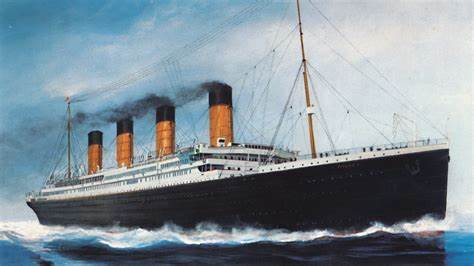

###**Getting to Know a Dataset:**

You have recently joined a **data analysis team** that is investigating passenger **survival patterns on the Titanic**. You have been provided with the famous **Titanic** dataset. Your first task is to explore and clean the dataset using pandas.

**1.** Display the first fifteen rows of the **titanic** DataFrame.

In [28]:
from google.colab import files
uploaded = files.upload()





Saving Titanic_Dataset.csv to Titanic_Dataset (2).csv


In [29]:
import pandas as pd

df = pd.read_csv("Titanic_Dataset.csv")  # Replace with your actual file name
print(df.head(15))


    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

**2.** Print a summary of column non-missing values and data types from the **titanic** DataFrame.

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


**3.** Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in **titanic**.

In [31]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**4.** Count and display the number of unique passenger classes **Pclass** in the dataset.

In [32]:

unique_pclass_count = df["Pclass"].nunique()

unique_pclass_values = df["Pclass"].unique()

print(f"Number of unique passenger classes: {unique_pclass_count}")
print(f"Unique passenger classes: {unique_pclass_values}")


Number of unique passenger classes: 3
Unique passenger classes: [3 1 2]


**5.** Use a method to count the number of passengers by gender **(column "Sex")** in the **titanic** dataset.

In [33]:

gender_counts = df["Sex"].value_counts()


print(gender_counts)


Sex
male      577
female    314
Name: count, dtype: int64


**6.** Find the top five ticket prices **(Fare)** in the dataset.

In [34]:
df_reset = df.reset_index(drop=False)
top_fares = df_reset.nlargest(5, "Fare")[["PassengerId", "Fare", "Ticket"]]
print(top_fares)


     PassengerId      Fare    Ticket
258          259  512.3292  PC 17755
679          680  512.3292  PC 17755
737          738  512.3292  PC 17755
27            28  263.0000     19950
88            89  263.0000     19950


**7.** Your colleague has informed you that the data on passengers in **Pclass 3** (third class) is incomplete, and you'd like to identify and exclude these passengers from your analysis. Your task is to identify passengers who are not in Pclass 3.

In [35]:
filtered_passengers = df[df["Pclass" ]!= 3]

print(filtered_passengers)

filtered_passengers.to_csv("filtered_titanic.csv", index=False)




     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
9             10         1       2   
11            12         1       1   
..           ...       ...     ...   
880          881         1       2   
883          884         0       2   
886          887         0       2   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

###**Data Cleaning:**

####**Addressing Missing Data:**

The **Titanic** dataset contains missing values that need to be handled before analysis.

**1.** Print the number of missing values in each column of the **titanic** DataFrame.

In [36]:
missing_values = df.isnull().sum()

print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**2.** Check the distribution of the **Age** column using a histogram. After analyzing the distribution of the column, handle the missing values in the Age column by imputing or removing them. Justify your choice of handling method.

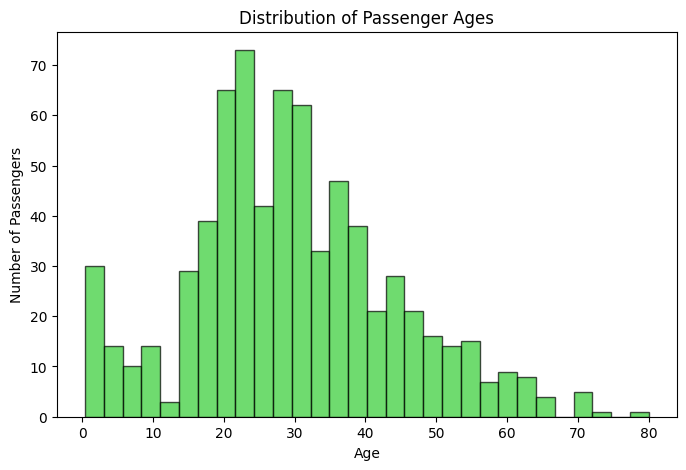

In [37]:
import matplotlib.pyplot as plt

# Plot histogram for Age column
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=30, color="limegreen", edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")
plt.show()



**Since the Histogram is rightly skewed(most ages are between 20 and 40)  so we will impute this through median**


In [38]:
df["Age"] = df["Age"].fillna(df["Age"].median())


In [39]:
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**3.** Handle the missing values in the **Cabin** column by filling them with the value **"Unknown"**.

In [40]:
df["Cabin"] = df["Cabin"].fillna("Unknown")


**4.** Handle the missing values in the **Embarked** column by filling them with the most frequent value (mode).

In [41]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


####**Handling Outliers:**

Identifying and dealing with outliers is an integral step of Data preprocessing.

**1.** Try to figure out if there are outliers in the **Fare** column of the **titanic** dataset using box plot.

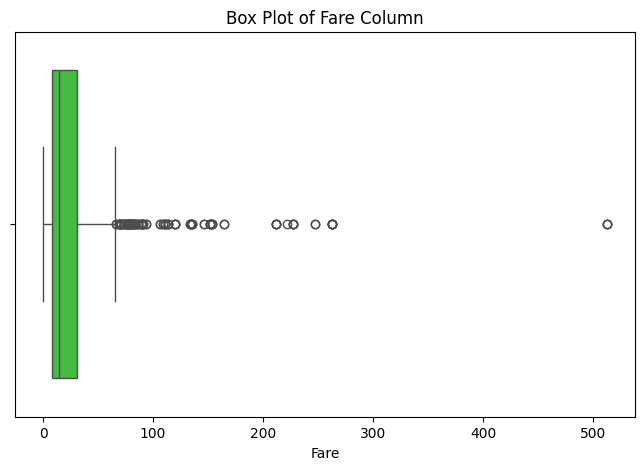

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create the box plot for Fare column
sns.boxplot(x=df["Fare"], color="limegreen")

# Add title and labels
plt.title("Box Plot of Fare Column")
plt.xlabel("Fare")

# Show the plot
plt.show()


**2.** Check the distribution of the **Fare** column using a histogram. After analyzing the distribution of the column, you have to only include passengers where the **Fare** is not an outlier using the Interquartile Range (IQR) method or Z-Score method. Justify your selection.

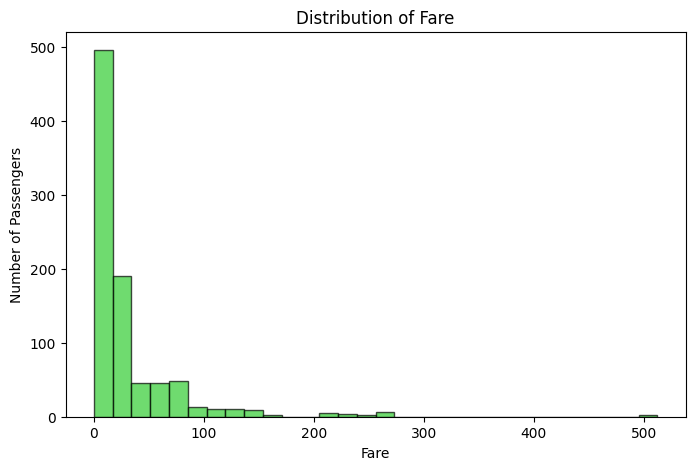

In [43]:
import matplotlib.pyplot as plt

# Plot histogram for Fare column
plt.figure(figsize=(8, 5))
plt.hist(df["Fare"], bins=30, color="limegreen", edgecolor="black", alpha=0.7)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Fare")
plt.show()


In [44]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"Dataset size after removing outliers: {df.shape[0]} rows")


Dataset size after removing outliers: 775 rows


**3.** Perform equal-width binning on **Age** column to categorize continuous values into discrete bins and apply meadian smoothing.

In [50]:
import pandas as pd

df = df.copy()


df["Age"] = df["Age"].fillna(df["Age"].median())

num_bins = 5
df["Age_Bin"] = pd.cut(df["Age"], bins=num_bins, labels=False)


df["Smoothed_Age"] = df.groupby("Age_Bin")["Age"].transform("median")


print(df[["Age", "Age_Bin", "Smoothed_Age"]].head(20))


     Age  Age_Bin  Smoothed_Age
0   22.0        1          28.0
2   26.0        1          28.0
3   35.0        2          39.0
4   35.0        2          39.0
5   28.0        1          28.0
6   54.0        3          54.0
7    2.0        0           7.0
8   27.0        1          28.0
9   14.0        0           7.0
10   4.0        0           7.0
11  58.0        3          54.0
12  20.0        1          28.0
13  39.0        2          39.0
14  14.0        0           7.0
15  55.0        3          54.0
16   2.0        0           7.0
17  28.0        1          28.0
18  31.0        1          28.0
19  28.0        1          28.0
20  35.0        2          39.0


####**Remove Duplicates:**

Remove duplicate records from data set to ensure data integrity.

In [46]:
df.drop_duplicates(inplace=True)

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   
5                              Moran, Mr. James    male  28.0      0      0   

             Ticket     Fare    Cabin Embarked  Age_Bin  Smoothed_Age  
0         A/5 21171   7.2500  Unknown        S        1          28.0  
2  STON/O2. 3101282   7.9250  Unknown        S        1          28.0  
3            113803  53.1000     C123        S        2          39.0  
4            373450 

<ipython-input-46-4b3c92225fe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


###**Data Transformation:**

Data transformation is the process of organizing raw data into a format that is suitable for analysis or further processing.

**1.** **Data Normalization:** Check the distribution of the **Age** column using a histogram. After analyzing the distribution of the column, normalize the **Age** column using Min-Max scaling or Standardization. Justify your choice.

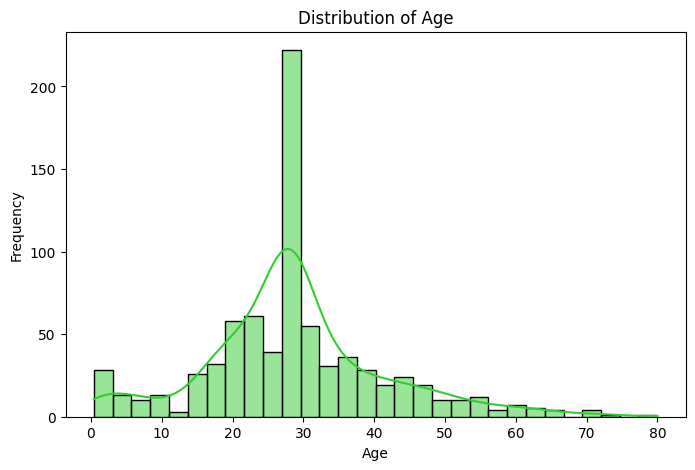

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="limegreen")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Age_Normalized"] = scaler.fit_transform(df[["Age"]])

print(df[["Age", "Age_Normalized"]].head())


    Age  Age_Normalized
0  22.0        0.271174
2  26.0        0.321438
3  35.0        0.434531
4  35.0        0.434531
5  28.0        0.346569


**2.** Rename the **Fare** column to **Fare (USD)**.

In [47]:
df = df.copy()
df.rename(columns={"Fare": "Fare (USD)"}, inplace=True)


**3.** **Data Encoding:** Apply label encoding or one-hot encoding on **Sex** column. Justify your selection.

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])


In [49]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1  22.0      1      0   
2                        Heikkinen, Miss. Laina    0  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                      Allen, Mr. William Henry    1  35.0      0      0   
5                              Moran, Mr. James    1  28.0      0      0   

             Ticket  Fare (USD)    Cabin Embarked  Age_Bin  Smoothed_Age  
0         A/5 21171      7.2500  Unknown        S        1          28.0  
2  STON/O2. 3101282      7.9250  Unknown        S        1          28.0  
3            113803     53.1000     C123        S        2          39.0  
4            373450      8

##**Part 2: Exploratory Data Analysis (EDA)**

Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, mode, minimum, maximum, variance and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

**NOTE: In EDA, you will use only the cleaned dataset (without missing values, duplicates and outliers) but should not use the transformed data (normalized or encoded).**

**1.** Display the mean and median of all numerical columns.

In [51]:

mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)

print("Mean of numerical columns:\n", mean_values)
print("\nMedian of numerical columns:\n", median_values)


Mean of numerical columns:
 PassengerId     445.806452
Survived          0.339355
Pclass            2.480000
Sex               0.685161
Age              28.748710
SibSp             0.437419
Parch             0.340645
Fare (USD)       17.822091
Age_Bin           1.245161
Smoothed_Age     29.863871
dtype: float64

Median of numerical columns:
 PassengerId     450.0
Survived          0.0
Pclass            3.0
Sex               1.0
Age              28.0
SibSp             0.0
Parch             0.0
Fare (USD)       13.0
Age_Bin           1.0
Smoothed_Age     28.0
dtype: float64


**2.** Print the maximum and minimum values of the **Fare** column.

In [55]:

max_fare = df["Fare (USD)"].max()
min_fare = df["Fare (USD)"].min()

print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


Maximum Fare: 65.0
Minimum Fare: 0.0


**3.** Group passengers by **Pclass** and calculate the average **Fare** per class.

In [56]:

avg_fare_per_class = df.groupby("Pclass")["Fare (USD)"].mean()


print(avg_fare_per_class)


Pclass
1    37.052978
2    19.186266
3    12.867449
Name: Fare (USD), dtype: float64


**4.** The `.agg()` method allows you to apply more than one function at the same time to the DataFrame. Calculate the variance and standard deviation of the **Age** column using the `.agg()` method.

In [57]:

age_stats = df["Age"].agg(["var", "std"])


print(age_stats)


var    163.382674
std     12.782123
Name: Age, dtype: float64


**5.** The `.agg()` method also allows you to apply custom functions to a DataFrame. Create a custom **IQR** function using `.agg()` to calculate the Interquartile Range (IQR) for **Age**, **Fare**, and **SibSp**.

In [58]:
import numpy as np


def iqr(series):
    return np.percentile(series, 75) - np.percentile(series, 25)


iqr_values = df[["Age", "Fare (USD)", "SibSp"]].agg(iqr)


print(iqr_values)


Age           12.0000
Fare (USD)    18.1042
SibSp          1.0000
dtype: float64


**6.** Take a subset of the dataset for passengers who survived (**Survived = 1**) and calculate the mean age of these passengers.

In [59]:

survived_passengers = df[df["Survived"] == 1]


mean_age_survived = survived_passengers["Age"].mean()


print("Mean Age of Survived Passengers:", mean_age_survived)


Mean Age of Survived Passengers: 26.645437262357415


##**Data Visualization**

Visualizing data provides insights into distribution patterns and relationships between variables.

Your tasks will involve:

**Univariate Analysis:** Analyze the distribution of individual variables.

**Bivariate Analysis:** Explore the relationships between two variables.

###**Univariate Analysis:**

**1. Histograms: (Good for interval data)**

A histogram divides the data into discrete intervals or "bins" and shows the number of data points that fall into each bin.

* Create a histogram for **Fare** to analyze fare distribution.

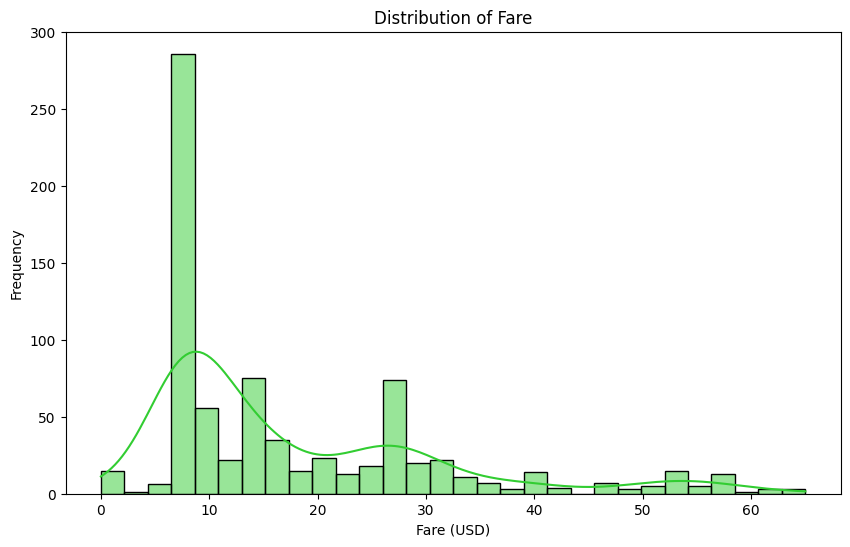

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))


sns.histplot(df["Fare (USD)"], bins=30, kde=True, color="limegreen")


plt.xlabel("Fare (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Fare")


plt.show()


**2. Bar Charts: (Good for nominal and small ordinal categorical data)**

Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

* Create a bar chart for **Pclass** to visualize the number of passengers in each class.

<ipython-input-62-d8bb3dfa7ad9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Pclass"], palette="viridis")


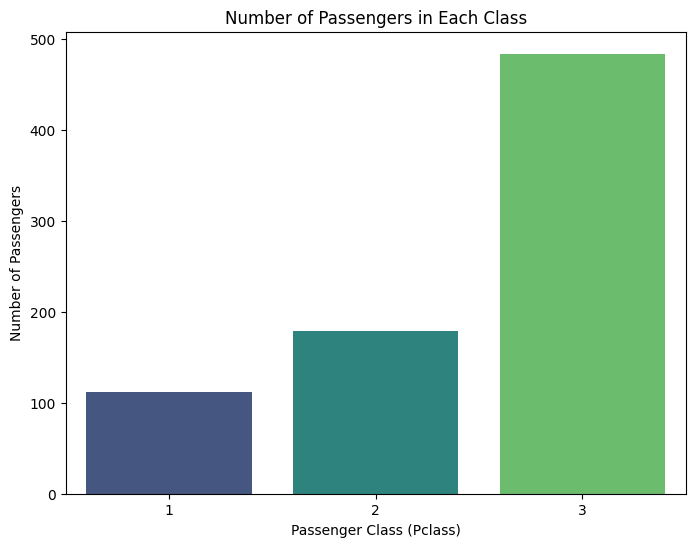

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))


sns.countplot(x=df["Pclass"], palette="viridis")


plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers in Each Class")


plt.show()


**3. Boxplots:**

A box-and-whisker plot is a graphical representation of the spread and distribution of a dataset. It displays the central tendency, data spread, and identifies potential outliers.

* Use a boxplot to check for outliers in the **Age**.

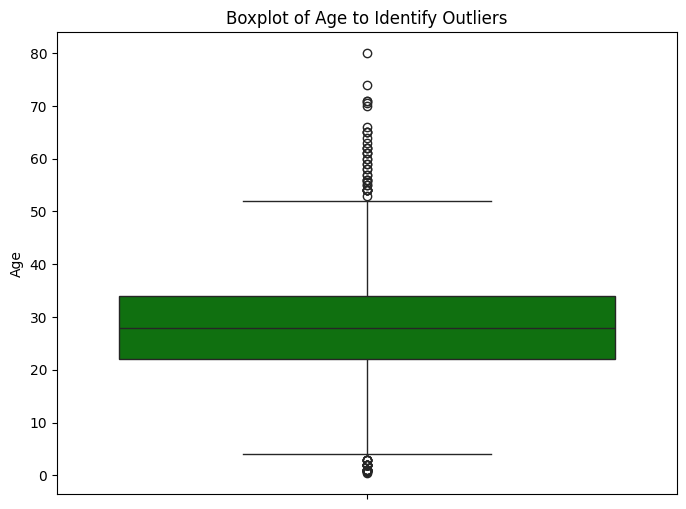

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))


sns.boxplot(y=df["Age"], color="green")

plt.title("Boxplot of Age to Identify Outliers")


plt.show()


**4. Pie Chart: (Ideal for visualizing proportions of categorical data)**

A pie chart represents data as slices of a pie, showing the proportion of each category in a single variable.

* Create a pie chart for **Survived** to show the proportion of survivors and non-survivors.

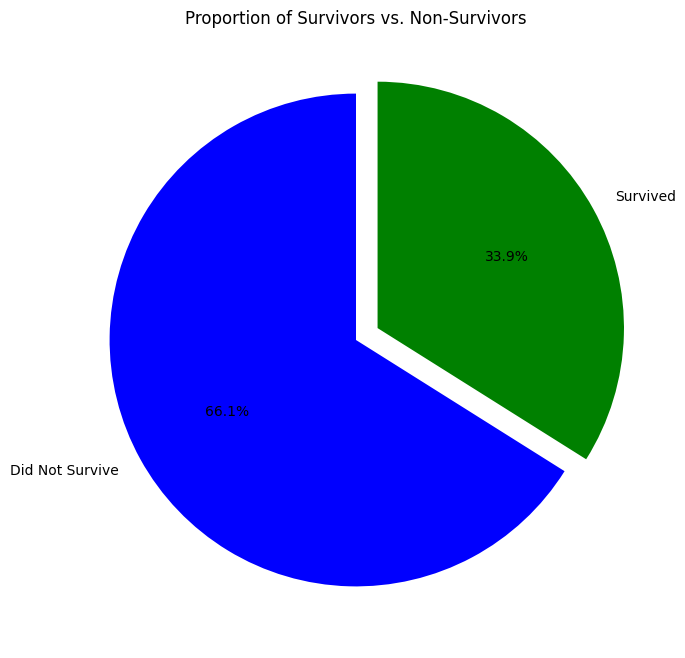

In [67]:
import matplotlib.pyplot as plt


survival_counts = df["Survived"].value_counts()


labels = ["Did Not Survive", "Survived"]


plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct="%1.1f%%", colors=["blue", "green"], startangle=90, explode=[0, 0.1])


plt.title("Proportion of Survivors vs. Non-Survivors")


plt.show()


###**Bivariate Analysis:**

**1. Scatter Plots: (Good for interval and some nominal categorical data)**

A scatter plot is a graphical representation of data points in a Cartesian coordinate system. Each data point is represented as a dot on the plot. Scatter plots are used to visualize the relationship between two continuous variables, making them suitable for assessing correlation.

* Analyze the relationship between **Age** and **Fare**.

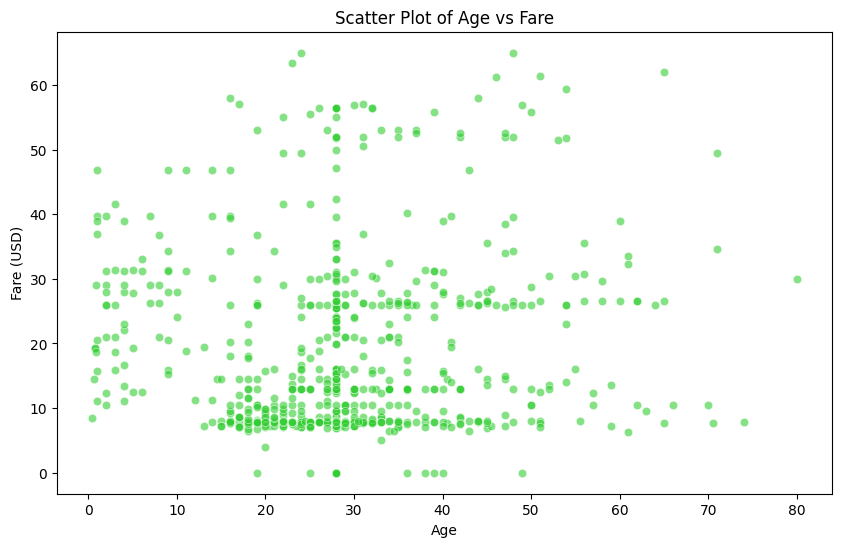

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


sns.scatterplot(x=df["Age"], y=df["Fare (USD)"], alpha=0.6, color="limegreen")


plt.xlabel("Age")
plt.ylabel("Fare (USD)")
plt.title("Scatter Plot of Age vs Fare")

plt.show()


**2. Boxplots:**

Create a boxplot for **Fare** grouped by **Pclass** to examine fare variations across classes.

<ipython-input-74-8af12cd0dec8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Pclass"], y=df["Fare (USD)"], palette="pastel")


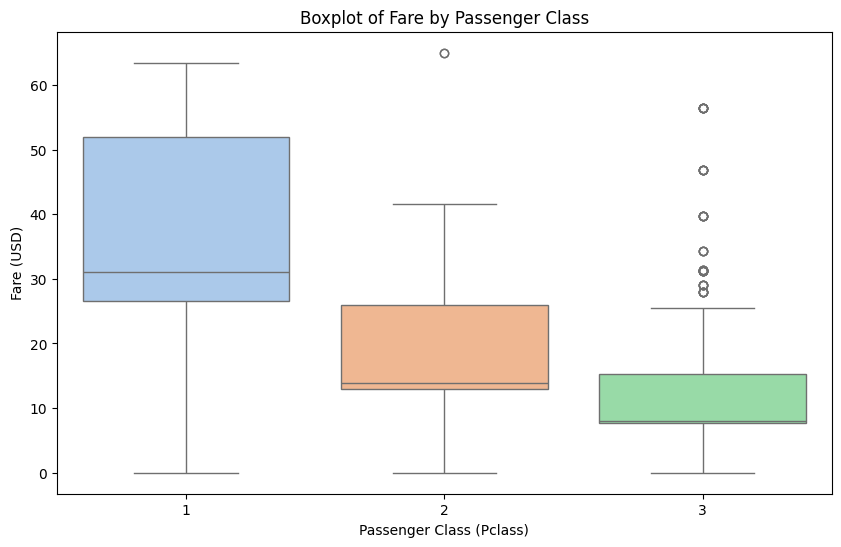

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))


sns.boxplot(x=df["Pclass"], y=df["Fare (USD)"], palette="pastel")


plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Fare (USD)")
plt.title("Boxplot of Fare by Passenger Class")

plt.show()


##**Correlation Analysis**

Correlation is a statistical measure that helps us understand the relationship or association between two or more variables in a dataset. It tells us how these variables change in relation to each other. Correlation is often used to determine whether there's a connection between variables and, if so, the strength and direction of that connection.

**1.** Calculate the correlation between the following pairs of variables:

* **Age** and **Fare**

In [75]:
correlation = df["Age"].corr(df["Fare (USD)"])
print(f"Correlation between Age and Fare: {correlation:.4f}")


Correlation between Age and Fare: 0.0857


**2.** Create a heatmap to visualize the correlation between **Age** and **Fare**.



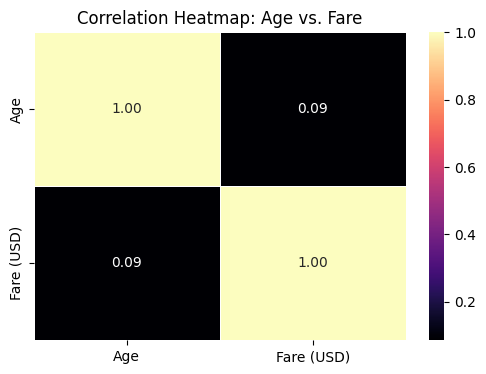

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[["Age", "Fare (USD)"]].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap: Age vs. Fare")
plt.show()


**3.** Perform a Chi-Square test to analyze the relationship between **Survived** and **Pclass**.

In [80]:
import pandas as pd
import scipy.stats as stats


contingency_table = pd.crosstab(df["Survived"], df["Pclass"])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=["Did not Survive", "Survived"], columns=contingency_table.columns))


alpha = 0.05
if p < alpha:
    print(" Conclusion: There is a significant relationship between Survived and Pclass.")
else:
    print(" Conclusion: No significant relationship between Survived and Pclass.")


Chi-Square Statistic: 50.4109
P-value: 0.0000
Degrees of Freedom: 2
Expected Frequencies Table:
Pclass                   1           2           3
Did not Survive  73.992258  118.255484  319.752258
Survived         38.007742   60.744516  164.247742
🔍 Conclusion: There is a significant relationship between Survived and Pclass.
